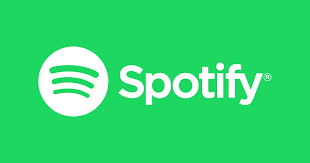

In [19]:
import pickle
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

## Read data

In [4]:
with open('../data/test.pkl','rb') as f:
    test = pickle.load(f)
    print(test.shape)
    
with open('../data/train.pkl','rb') as f:
    train = pickle.load(f)
    print(train.shape)

(8720, 19)
(24108, 19)


In [8]:
X_train, y_train = train[:, :18], train[:, 18]
X_test, y_test = test[:, :18], test[:, 18]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24108, 18), (24108,), (8720, 18), (8720,))

## Model

For now my aim to get at least 75% accuracy

In [28]:
ACCURACY_THRESHOLD = 0.75
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('acc') is not None and logs.get('acc') >= ACCURACY_THRESHOLD:
            print(f"Reached {ACCURACY_THRESHOLD * 100}% accuracy, so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [29]:
input_shape = X_train.shape[1]

In [44]:
model = keras.Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=[input_shape]),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                608       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 21,409
Trainable params: 21,409
Non-trainable params: 0
__________________________________________________

In [45]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)

In [46]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
)

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.2335 - accuracy: 0.0610 - val_loss: 0.2031 - val_accuracy: 0.0761
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.0652 - val_loss: 0.2010 - val_accuracy: 0.0702
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.0664 - val_loss: 0.1998 - val_accuracy: 0.0768
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.0637 - val_loss: 0.1997 - val_accuracy: 0.0799
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.0650 - val_loss: 0.1988 - val_accuracy: 0.0782
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1918 - accuracy: 0.0655 - val_loss: 0.1998 - val_accuracy: 0.0639
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1919 - accuracy: 0.0624 - val_loss: 0.1977 - val_accuracy: 0.0747
Epoch 8/50
48/48 [==